In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [11]:
filename = "mpd/data/mpd.slice.0-999.json"
filename = "mpd.slice.0-999.json"

In [12]:
with open(filename) as file:
    data = json.load(file)

In [15]:
playlist_list = []
for i in range(len(data['playlists'])):
    playlist_list.append(data['playlists'][i])

In [16]:
def get_tracks(playlist):
    track_list = set([])
    for i in range(playlist['num_tracks']):
        track_list.add(playlist['tracks'][i]['track_uri'])
    return track_list

In [18]:
track_audio_features = {}
for i in range (len(playlist_list)):
        playlist = playlist_list[i]
        for j in range(playlist['num_tracks']):
            track_uri = playlist['tracks'][j]['track_uri']
            if track_uri not in track_audio_features:
                track_audio_features[track_uri] = sp.audio_features([track_uri])[0]

retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying .

retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying .

In [4]:
sp.audio_features(['spotify:track:20ORwCJusz4KS2PbTPVNKo'])

[{'danceability': 0.693,
  'energy': 0.709,
  'key': 9,
  'loudness': -5.787,
  'mode': 1,
  'speechiness': 0.0608,
  'acousticness': 0.0352,
  'instrumentalness': 3.4e-06,
  'liveness': 0.0688,
  'valence': 0.889,
  'tempo': 79.237,
  'type': 'audio_features',
  'id': '20ORwCJusz4KS2PbTPVNKo',
  'uri': 'spotify:track:20ORwCJusz4KS2PbTPVNKo',
  'track_href': 'https://api.spotify.com/v1/tracks/20ORwCJusz4KS2PbTPVNKo',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/20ORwCJusz4KS2PbTPVNKo',
  'duration_ms': 216880,
  'time_signature': 4}]

In [7]:
sp.artist('spotify:artist:2Hjj68yyUPiC0HKEOigcEp')

{'external_urls': {'spotify': 'https://open.spotify.com/artist/2Hjj68yyUPiC0HKEOigcEp'},
 'followers': {'href': None, 'total': 464343},
 'genres': ['dance pop',
  'neo mellow',
  'pop',
  'pop rock',
  'post-teen pop',
  'r&b',
  'viral pop'],
 'href': 'https://api.spotify.com/v1/artists/2Hjj68yyUPiC0HKEOigcEp',
 'id': '2Hjj68yyUPiC0HKEOigcEp',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/28de6a64bee4b55bbf5fc0f3e165bdf6a1b202d3',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/9a52cdd9da1340393a24cbc6a547bd21acedfbeb',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/d17802f3c6417b9f8225573af90098b168948ed6',
   'width': 160}],
 'name': 'Jesse McCartney',
 'popularity': 66,
 'type': 'artist',
 'uri': 'spotify:artist:2Hjj68yyUPiC0HKEOigcEp'}

In [78]:
audio_df = pd.DataFrame(track_audio_features).T
audio_df = audio_df[['acousticness', 'danceability', 'duration_ms', 'energy',
        'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature',
       'valence']]
audio_df = audio_df.astype(float)

In [79]:
audio_df.shape

(34443, 13)

In [80]:
audio_df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [82]:
audio_df['danceability'].mean()

0.5847944834794727

In [83]:
audio_df['danceability'].describe()

count    34442.000000
mean         0.584794
std          0.164288
min          0.000000
25%          0.476000
50%          0.593000
75%          0.704750
max          0.988000
Name: danceability, dtype: float64

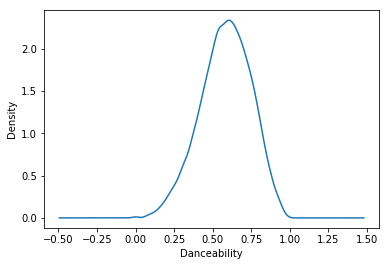

In [84]:
audio_df['danceability'].plot.kde()
plt.xlabel('Danceability')
plt.show()

In [85]:
audio_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,34442.000000,34442.000000,3.444200e+04,34442.000000,34442.000000,34442.000000,34442.000000,34442.000000,34442.000000,34442.000000,34442.000000,34442.000000,34442.000000
mean,0.264177,0.584794,2.343055e+05,0.636725,0.076923,5.216654,0.197943,-7.608603,0.665699,0.091687,121.730653,3.926137,0.486517
std,0.300547,0.164288,7.501657e+04,0.225224,0.218433,3.581442,0.167694,3.964591,0.471752,0.101517,29.306967,0.371688,0.243396
min,0.000000,0.000000,3.056000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.020300,0.476000,1.955090e+05,0.490000,0.000000,2.000000,0.095900,-9.172500,0.000000,0.035100,98.652250,4.000000,0.292000
50%,0.126000,0.593000,2.247730e+05,0.669000,0.000008,5.000000,0.128000,-6.697500,1.000000,0.049100,120.964000,4.000000,0.478000
75%,0.445000,0.704750,2.611960e+05,0.818000,0.002638,8.000000,0.253000,-5.005000,1.000000,0.096400,140.031750,4.000000,0.678000
max,0.996000,0.988000,2.424190e+06,1.000000,0.995000,11.000000,1.000000,2.766000,1.000000,0.962000,232.690000,5.000000,0.998000


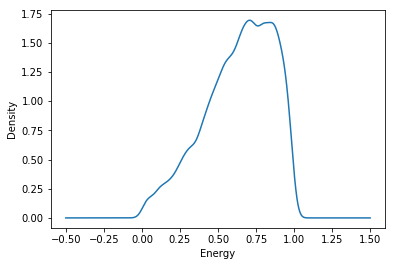

In [87]:
audio_df['energy'].plot.kde()
plt.xlabel('Energy')
plt.show()

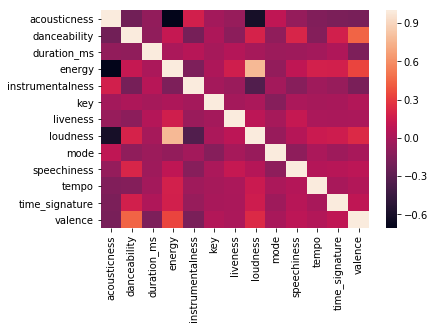

In [93]:
corr = audio_df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

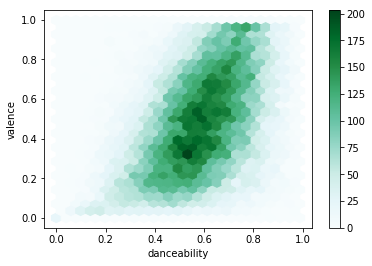

In [110]:
audio_df.plot.hexbin(x='danceability', y='valence', gridsize=25, sharex= False)
plt.show()

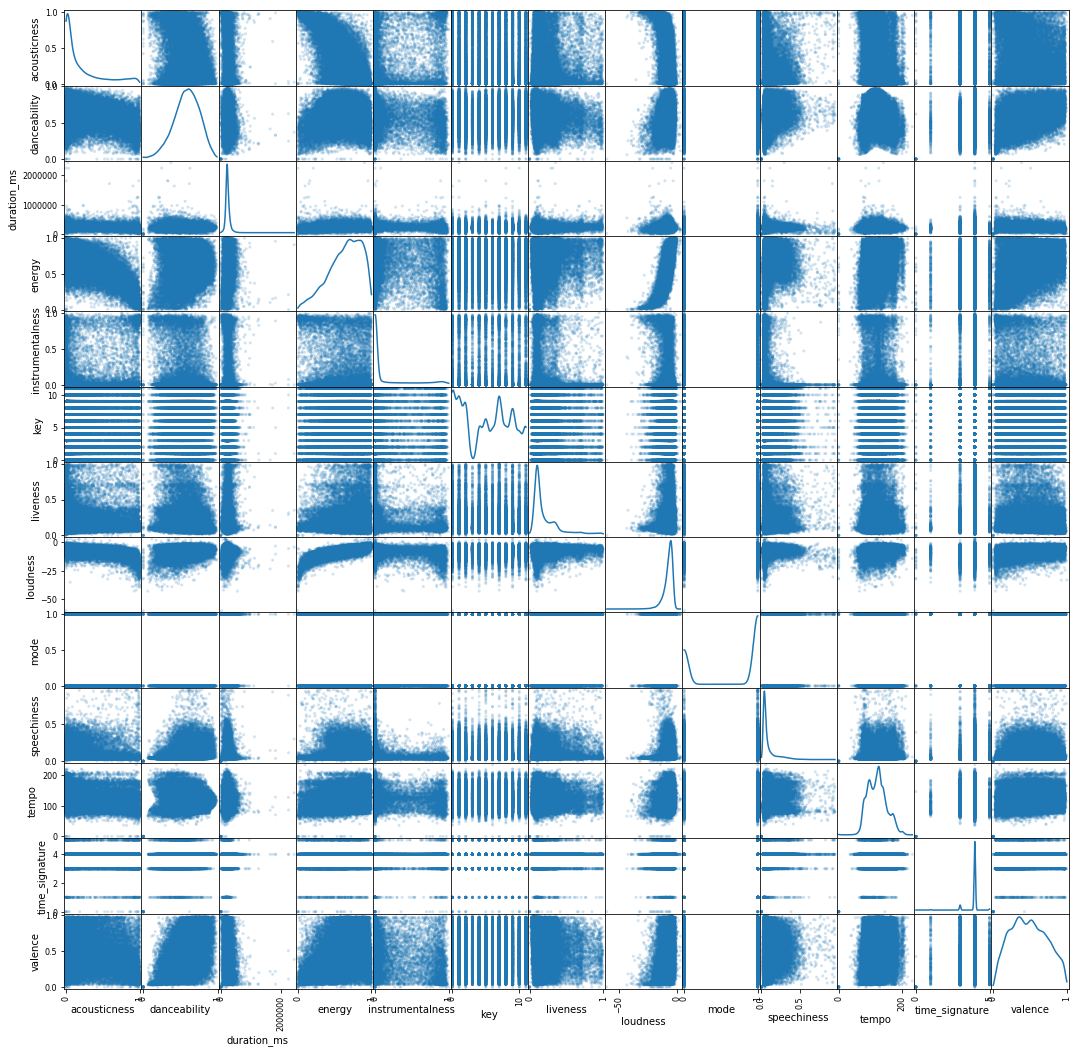

In [115]:
from pandas.plotting import scatter_matrix
scatter_matrix(audio_df, alpha=0.2, figsize=(18, 18), diagonal='kde')
plt.show()